In [43]:
#### Claire's PAW tracker is meant to be an education tool to provide an anlaysis of a dog's breathing rate per minute. 
# Monitoring breathing rate per minute is important for dogs with cardiac issues.
# Seek advise from a qualified vet for advice.

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
# Import csv into pandas dataframe
# df = pd.read_csv('breathingdata.csv', sep=',')
# Import the dataset breathingdata.csv into pandas dataframe, "df"
url = "https://raw.githubusercontent.com/GriffsKode/griffskode.github.io/main/files/breathingdata.csv"
df = pd.read_csv(url, sep=",")

#Print first five lines of the imported csv file to ensure data was imported correctly
df.head(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose
0,2/24/2024 15:50,2/24/2024,15:50,23.0,0.7,1.25,1.25
1,2/24/2024 15:52,2/24/2024,15:52,22.0,0.7,1.25,1.25
2,2/24/2024 21:34,2/24/2024,21:34,12.0,0.7,1.25,1.25
3,2/24/2024 21:36,2/24/2024,21:36,12.0,0.7,1.25,1.25
4,2/25/2024 13:13,2/25/2024,13:13,14.0,0.7,1.25,1.25


In [45]:
# Print last five lines of the imported csv file to ensure all data was imported
df.tail(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose
159,8/3/2024 7:59,8/3/2024,7:59 AM,13.0,0.8,1.25,1.25
160,8/3/2024 8:01,8/3/2024,8:01 AM,13.0,0.8,1.25,1.25
161,8/5/2024 21:12,8/5/2024,9:12 PM,15.0,0.8,1.25,1.25
162,8/5/2024 21:14,8/5/2024,9:14 PM,15.0,0.8,1.25,1.25
163,8/6/2024 8:01,8/6/2024,8:01 AM,13.0,0.8,1.25,1.25


In [46]:
# Pandas dataframe describe function to better understand the data. 
summary = df.describe()
formatted_summary = summary.round(2)
print(formatted_summary)

       breaths_per_minute  furosemide_dose  vetmedin_dose  enalapril_dose
count              151.00           163.00         164.00          164.00
mean                16.14             0.69           1.25            1.25
std                  3.96             0.13           0.00            0.00
min                  9.00             0.50           1.25            1.25
25%                 13.00             0.56           1.25            1.25
50%                 15.00             0.80           1.25            1.25
75%                 19.00             0.80           1.25            1.25
max                 31.00             0.80           1.25            1.25


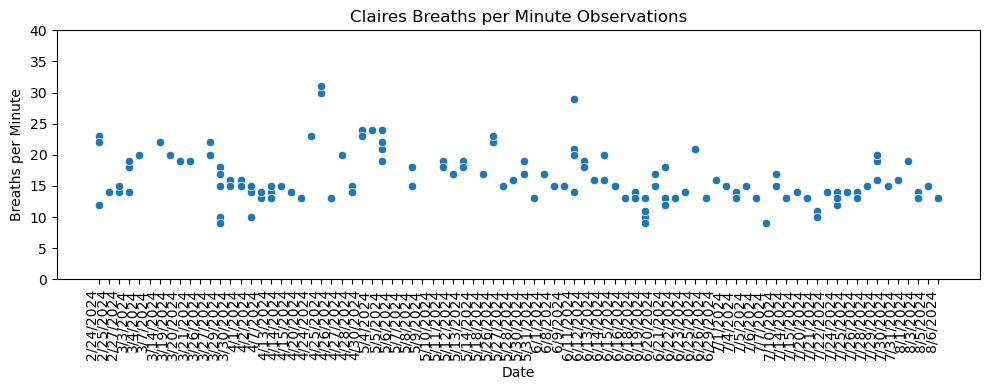

In [47]:
# Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data. 
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Create scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Date', y='Breaths per Minute', data=data)

# Format x-axis labels
plt.xticks(rotation=90, ha='right')
# Set y-axis range
plt.ylim(0, 40)

# Add title and labels
plt.title('Claires Breaths per Minute Observations')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Data Points')

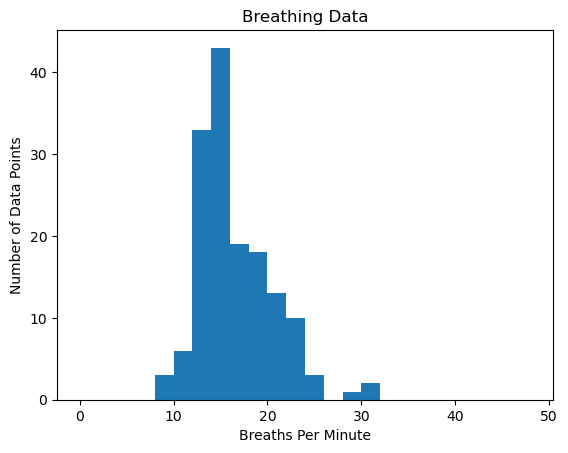

In [48]:
plt.hist(df['breaths_per_minute'], bins = range(0,50,2))
plt.title('Breathing Data')
plt.xlabel('Breaths Per Minute')
plt.ylabel('Number of Data Points')

In [49]:
# OLS Regression to determine if the furosemide_dose has a correlation with breaths per minute.
# P>|t| value should be greater than 0.05 to be significant. 
est = ols(formula="breaths_per_minute ~ furosemide_dose", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     breaths_per_minute   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.468
Date:                Tue, 06 Aug 2024   Prob (F-statistic):             0.0207
Time:                        21:46:43   Log-Likelihood:                -416.42
No. Observations:                 150   AIC:                             836.8
Df Residuals:                     148   BIC:                             842.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          20.3720      1.846     

In [50]:
print(df)

           date_time       date     time  breaths_per_minute  furosemide_dose  \
0    2/24/2024 15:50  2/24/2024    15:50                23.0              0.7   
1    2/24/2024 15:52  2/24/2024    15:52                22.0              0.7   
2    2/24/2024 21:34  2/24/2024    21:34                12.0              0.7   
3    2/24/2024 21:36  2/24/2024    21:36                12.0              0.7   
4    2/25/2024 13:13  2/25/2024    13:13                14.0              0.7   
..               ...        ...      ...                 ...              ...   
159    8/3/2024 7:59   8/3/2024  7:59 AM                13.0              0.8   
160    8/3/2024 8:01   8/3/2024  8:01 AM                13.0              0.8   
161   8/5/2024 21:12   8/5/2024  9:12 PM                15.0              0.8   
162   8/5/2024 21:14   8/5/2024  9:14 PM                15.0              0.8   
163    8/6/2024 8:01   8/6/2024  8:01 AM                13.0              0.8   

     vetmedin_dose  enalapr